### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns

### Load Data

In [2]:
churnData = pd.read_csv ('DATA_Customer-Churn.csv')

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Data Cleaning

In [4]:
churnData.columns = churnData.columns.str.lower()

In [5]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### Check for Null Data

In [6]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [7]:
churnData.onlinesecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Convert TotalCharges in numeric

In [8]:
sum(churnData['totalcharges'] == " ")

11

In [9]:
churnData['totalcharges'].where(churnData['totalcharges'] != " ", 0, inplace=True) 

In [10]:
sum(churnData['totalcharges'] == " ")

0

In [11]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'])

In [12]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [13]:
mean_TotalCharges = np.mean(churnData['totalcharges'])

In [14]:
sum(churnData['totalcharges'] == 0)

11

In [15]:
#churnData['TotalCharges'] = list(map(lambda x: mean_TotalCharges if x[0] else x, churnData['TotalCharges']))

In [16]:
churnData['totalcharges'].where(churnData['totalcharges'] != 0, mean_TotalCharges, inplace=True) 

In [17]:
sum(churnData['totalcharges'] == 0)

0

<AxesSubplot:xlabel='totalcharges', ylabel='Count'>

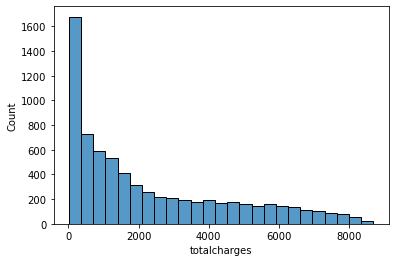

In [18]:
sns.histplot(churnData['totalcharges'])

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

In [19]:
X = churnData.select_dtypes(np.number)

In [20]:
X

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [21]:
y = churnData.iloc[:,-1]

In [22]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: object

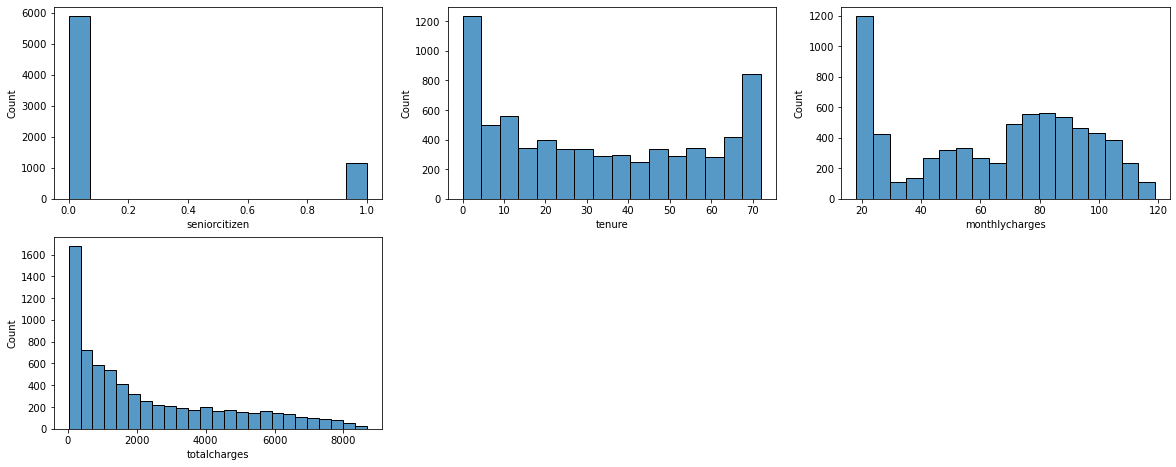

In [24]:
plt.figure(figsize=(20,12))
for i, column in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(X[column])

#### Train Test Split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#std_scaler = StandardScaler().fit(X_train) 
#X_train_scaled = std_scaler.transform(X_train)
#X_test_scaled=std_scaler.transform(X_test)

In [ ]:
#X_train_scaled

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)


In [33]:
y_train

877      No
5792    Yes
5334    Yes
878      No
6578     No
       ... 
79       No
3927    Yes
5955     No
6936    Yes
5640    Yes
Name: churn, Length: 4930, dtype: object

In [34]:
#performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               #'Train': [accuracy_score(y_train, y_pred_train_log),
                                         #precision_score(y_train, y_pred_train_log),
                                         #recall_score(y_train, y_pred_train_log)],
                               #'Test': [accuracy_score(y_test, y_pred_test_log),
                                        #precision_score(y_test, y_pred_test_log),
                                        #recall_score(y_test, y_pred_test_log)]})